# 1) Завантажую дані з файлу у датафрейм та виконую форматування

In [1]:
import numpy as np
import pandas as pd

In [11]:
nyc = pd.read_csv('nyc_1895_2018.csv')

In [12]:
nyc.head()

,Date,Value,Anomaly
0,189501,29.8,-1.8
1,189601,28.6,-3.0
2,189701,29.4,-2.2
3,189801,34.0,2.4
4,189901,30.0,-1.6


In [13]:
nyc.tail()

,Date,Value,Anomaly
119,201401,28.7,-2.9
120,201501,30.0,-1.6
121,201601,34.5,2.9
122,201701,38.1,6.5
123,201801,31.8,0.2


Перейменовую стовпець

In [14]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head()

,Date,Temperature,Anomaly
0,189501,29.8,-1.8
1,189601,28.6,-3.0
2,189701,29.4,-2.2
3,189801,34.0,2.4
4,189901,30.0,-1.6


Позбуваюсь 01

In [15]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head()

,Date,Temperature,Anomaly
0,1895,29.8,-1.8
1,1896,28.6,-3.0
2,1897,29.4,-2.2
3,1898,34.0,2.4
4,1899,30.0,-1.6


Переглянемо основні статистичні показники

In [16]:
nyc.describe()

,Date,Temperature,Anomaly
count,124.000000,124.000000,124.000000
mean,1956.500000,31.829032,0.229032
std,35.939764,4.472804,4.472804
min,1895.000000,20.900000,-10.700000
25%,1925.750000,29.100000,-2.500000
50%,1956.500000,31.600000,0.000000
75%,1987.250000,34.900000,3.300000
max,2018.000000,42.500000,10.900000


# 2) Представлення даних у вигляді регресійної прямої

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

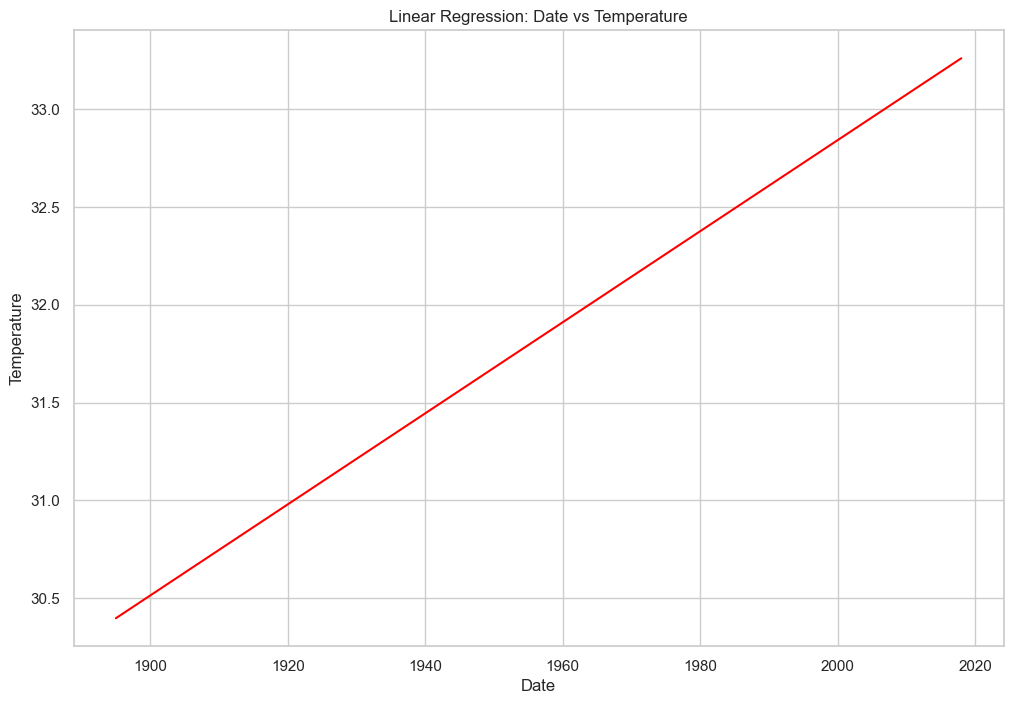

In [41]:
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

plt.figure(figsize=(12, 8))
plt.plot(nyc.Date, linear_regression.slope*nyc.Date + linear_regression.intercept, color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Linear Regression: Date vs Temperature')
plt.show()

# 3) Прогнозування даних на 2019, 2020, 2021 та 2022, 2023, 2024 роки.

In [62]:
years = list(range(2019, 2025))
predicted_temperatures = []

for x in years:
    predicted_temp = linear_regression.slope * x + linear_regression.intercept
    predicted_temperatures.append(predicted_temp)
    print("Для ", x, " року прогнозується температура: ", predicted_temp)

Для  2019  року прогнозується температура:  33.28308418568058
Для  2020  року прогнозується температура:  33.30634901652243
Для  2021  року прогнозується температура:  33.329613847364286
Для  2022  року прогнозується температура:  33.35287867820614
Для  2023  року прогнозується температура:  33.376143509048006
Для  2024  року прогнозується температура:  33.39940833988986


# 4) Оцінка показників температури до 1895 року

In [63]:
years = list(range(1880, 1895))

for x in years:
    predicted_temp = linear_regression.slope * x + linear_regression.intercept
    print("Оцінка можливої температури ", x, " року: ", predicted_temp)

Оцінка можливої температури  1880  року:  30.049272698662474
Оцінка можливої температури  1881  року:  30.072537529504334
Оцінка можливої температури  1882  року:  30.095802360346187
Оцінка можливої температури  1883  року:  30.119067191188048
Оцінка можливої температури  1884  року:  30.1423320220299
Оцінка можливої температури  1885  року:  30.16559685287176
Оцінка можливої температури  1886  року:  30.188861683713615
Оцінка можливої температури  1887  року:  30.212126514555475
Оцінка можливої температури  1888  року:  30.23539134539733
Оцінка можливої температури  1889  року:  30.25865617623919
Оцінка можливої температури  1890  року:  30.281921007081042
Оцінка можливої температури  1891  року:  30.305185837922902
Оцінка можливої температури  1892  року:  30.328450668764756
Оцінка можливої температури  1893  року:  30.351715499606616
Оцінка можливої температури  1894  року:  30.37498033044847


# 5) Використання функції regplot для виведення всіх точок даних

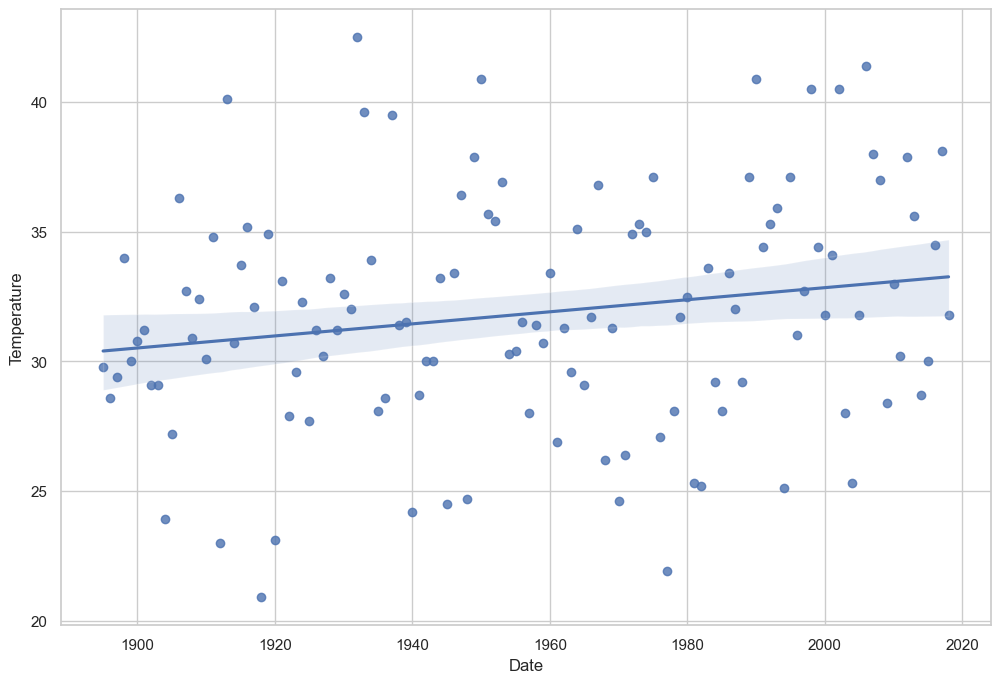

In [64]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)

Кут нахилу регресійної прямої вказує на те, що в останні 124 роки середня температура у Нью Йорку підвищувалась

# 6) Виконання масштабування осі y

Проведемо масштабування: установимо діапазон для y [10;50]

(10.0, 50.0)

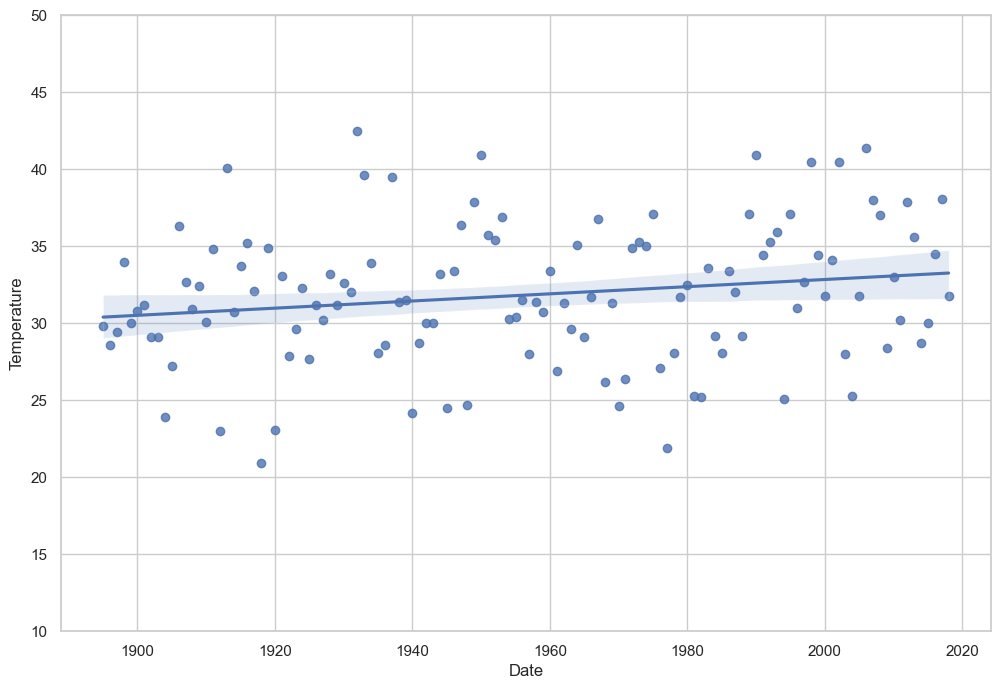

In [65]:
plt.figure(figsize=(12, 8))
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10,50)

# 7) Порівняння отриманого прогнозу з реальними даними з NOAA «Climate at a Glance»

Завантажимо дані з 2019 - 2024 роками у датафрейм

In [87]:
df_real = pd.read_csv('nyc_2019_2024.csv')

In [88]:
df_real

,Date,Value,Anomaly
0,201901,32.6,-3.0
1,202001,39.2,3.6
2,202101,34.8,-0.8
3,202201,30.4,-5.2
4,202301,43.5,7.9
5,202401,37.0,1.4


Проведемо форматування

In [89]:
df_real.drop(columns=['Anomaly'], inplace=True)
df_real.columns = ['Date', 'Real Temperature']

In [90]:
df_real.Date = df_real.Date.floordiv(100)
df_real

,Date,Real Temperature
0,2019,32.6
1,2020,39.2
2,2021,34.8
3,2022,30.4
4,2023,43.5
5,2024,37.0


Для наочності, помістимо реальні і прогнозовані дані у один датафрейм

In [91]:
df_real['Predicted_Temperature'] = predicted_temperatures
df_real

,Date,Real Temperature,Predicted_Temperature
0,2019,32.6,33.283084
1,2020,39.2,33.306349
2,2021,34.8,33.329614
3,2022,30.4,33.352879
4,2023,43.5,33.376144
5,2024,37.0,33.399408


Додамо стовпець з різницями між реальною температурою та прогнозованою

In [92]:
df_real['Absolute_Difference'] = (df_real['Real Temperature'] - df_real['Predicted_Temperature']).abs()
df_real

,Date,Real Temperature,Predicted_Temperature,Absolute_Difference
0,2019,32.6,33.283084,0.683084
1,2020,39.2,33.306349,5.893651
2,2021,34.8,33.329614,1.470386
3,2022,30.4,33.352879,2.952879
4,2023,43.5,33.376144,10.123856
5,2024,37.0,33.399408,3.600592


Додамо стовпець з відсотковим співвідношенням абсолютною різниці температури до реальної температури

In [96]:
df_real['Diif_percent'] = (df_real['Absolute_Difference'] / df_real['Real Temperature']).abs() * 100 
df_real

,Date,Real Temperature,Predicted_Temperature,Absolute_Difference,Diif_percent
0,2019,32.6,33.283084,0.683084,2.095350
1,2020,39.2,33.306349,5.893651,15.034824
2,2021,34.8,33.329614,1.470386,4.225248
3,2022,30.4,33.352879,2.952879,9.713417
4,2023,43.5,33.376144,10.123856,23.273233
5,2024,37.0,33.399408,3.600592,9.731329


Отримавши всі потрібні дані, можемо зробити висновок:

    1. Прогноз на 2020 рік різниться з реальною температурою лише на показник, що приблизно становить 2% температури (у межах статистичної похибки)
    
    2. Для всіх інших досліджуваних років, прогноз виявся неточним 
    
    3. Узагальному, зберігається тенденції до зростання температури у січні